C:\Users\Helge\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


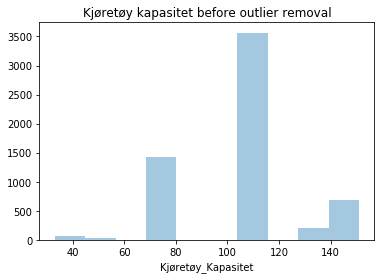

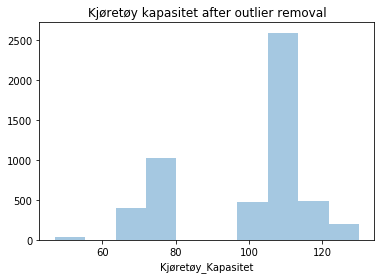

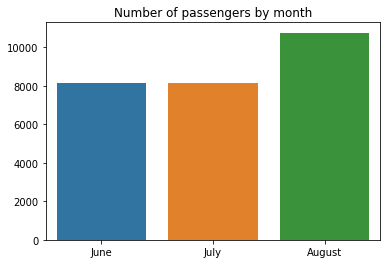

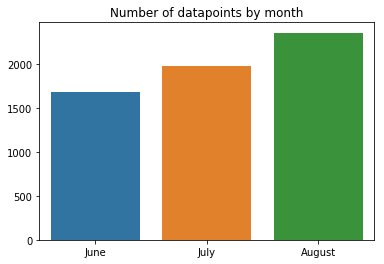

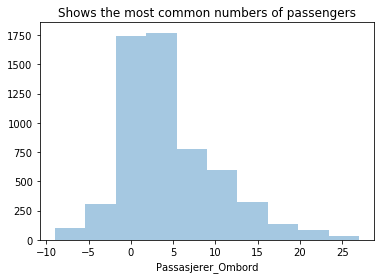

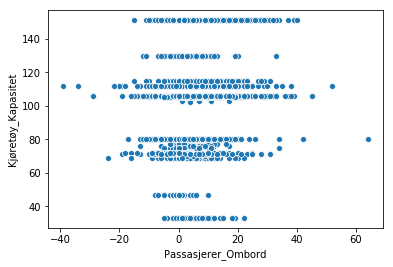

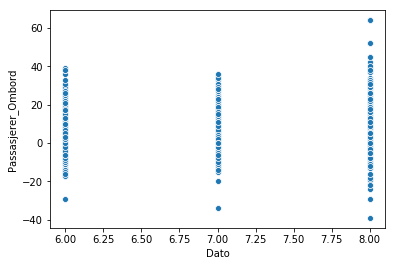

In [109]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

ruterData = pd.read_csv('ruterData.csv', delimiter=';')

#Plots Kjøretøy_Kapasitet
plt.figure()
sns.distplot(ruterData['Kjøretøy_Kapasitet'], bins=10, kde=False)
plt.title("Kjøretøy kapasitet before outlier removal") 

#Removes outliers in Kjøretøy_Kapasitet
thresold_max = ruterData['Kjøretøy_Kapasitet'].quantile(0.99)
thresold_min = ruterData['Kjøretøy_Kapasitet'].quantile(0.01)
kapasitet_no_outliers = ruterData[(ruterData['Kjøretøy_Kapasitet']<thresold_max) & (ruterData['Kjøretøy_Kapasitet']>thresold_min)]

#Plots Kjøretøy_Kapasitet after outlier removal
plt.figure()
sns.distplot(kapasitet_no_outliers['Kjøretøy_Kapasitet'], bins=10, kde=False)
plt.title("Kjøretøy kapasitet after outlier removal") 

#Adds together all Passajerer_Ombord inn the same month
date_month = ruterData['Dato']
month_tot_Passasjerer = [0] * 3
month_tot_times = [0] * 3
for i in range(0, len(date_month)):
    date_month[i] = int(date_month[i].split("/")[1])
    month_tot_Passasjerer[int(date_month[i])-6] += ruterData['Passasjerer_Ombord'][i]
    month_tot_times[date_month[i]-6] += 1
months = ['June','July','August']

plt.figure()
sns.barplot(x = months, y = month_tot_Passasjerer)
plt.title("Number of passengers by month") 
    
plt.figure()
sns.barplot(x = months, y = month_tot_times)
plt.title("Number of datapoints by month") 

thresold_max = ruterData['Passasjerer_Ombord'].quantile(0.99)
thresold_min = ruterData['Passasjerer_Ombord'].quantile(0.01)
passasjerer_no_outliers = ruterData[(ruterData['Passasjerer_Ombord']<thresold_max) & (ruterData['Passasjerer_Ombord']>thresold_min)]

plt.figure()
sns.distplot(passasjerer_no_outliers['Passasjerer_Ombord'], bins=10, kde=False)
plt.title("Shows the most common numbers of passengers")

plt.figure()
sns.scatterplot(x='Passasjerer_Ombord', y='Kjøretøy_Kapasitet', data=ruterData)

plt.figure()
sns.scatterplot(x='Dato', y='Passasjerer_Ombord', data=ruterData)
